<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 3 
## 26-04-2023
#### Autor: Yañez $\lambda$, Joaquin

En esta tarea semanal se nos pedía el diseño de un filtro de máxima planicidad, partiendo de la siguiente plantilla:

<img src="./Fotos/Consigna.png"/> 

A simple vista se observa que no será del tipo Butterworth ya que en la frecuencia de paso la atenuación pedida no es de $3dB$. A continuación se muestra el desarrollo de las consignas

In [1]:
from IPython.display import IFrame
IFrame("./TS3.pdf", width=800, height=800)

### Respuesta en frecuencia

Cabe recalcar como debido a la característica del filtro pedido, la respuesta en frecuencia del mismo comienza en 1 y va decayendo lentamente hasta que en la $f_p$ alcanza un valor de $|T(\omega_p)|= \frac{1}{1+\epsilon²}$, luego de esto decae bruscamente y asintoticamente a 0.

En cuanto a la fase vemos como al tener un sistema de tercer orden sin ningún 0, para $\omega = 0$ la fase comienza en 0. A medida que aumentamos la frecuencia, el aporte de fase de cada polo comienza a crecer hasta que en $\omega \rightarrow \infty$ el aporte de cada polo es de $\frac{\pi}{2}$ por lo que la fase será de $\frac {-3\pi}{2}$

### Armado del circuito pasivo

Para poder conseguir la transferencia de tercer orden con elementos pasivos principalmente lo que se realizó fue un circuito RLC para poder conseguir los dos polos complejos conjugados y luego utilizando un OPAMP como buffer para no cargar las etapas con un circuito RC se consiguió el polo simple real, como todos los polos se encuentran en el mismo radio (Filtro de Maxima planicidad) se pudo normalizar todos los componentes consiguiendo que todas las resistencias y capacitores sean del mismo valor. Acontinuación se deja la simulación del circuito pasivo normalizado en LTSpice.

<img src="./Fotos/LC_normalizado_esq.png"/>
<img src="./Fotos/LC_normalizado_out.png"/>

Ademas se simuló la transferencia en python quedando de la siguiente manera:


In [2]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, bodePlot

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

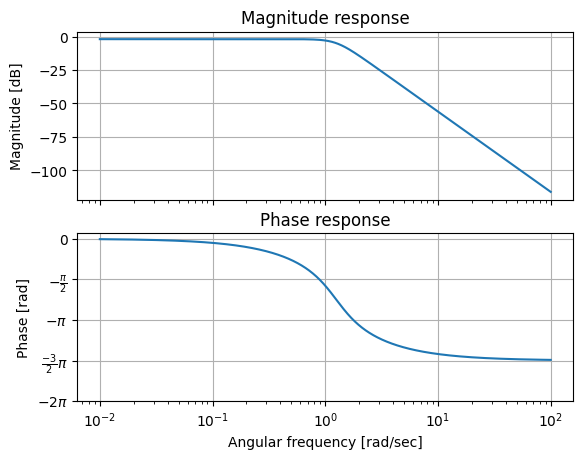

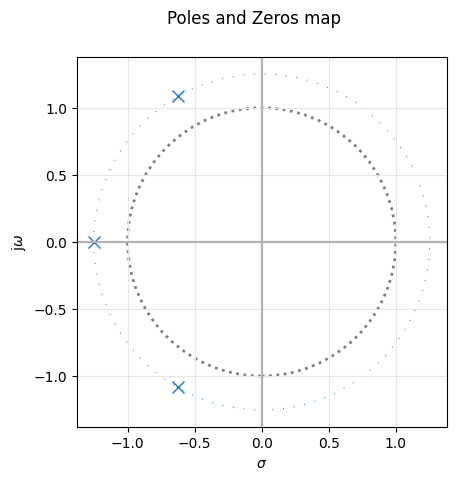

In [3]:
ep = (10**0.1 -1)**(1/2)

my_tf = TransferFunction( [ep**(-2/3)], [1, 2*ep**(-1/3), 2*ep**(-2/3), ep**-1] )


plt.close('all')

bodePlot(my_tf, fig_id=1)

pzmap(my_tf, fig_id=2) #S plane pole/zero plot

Es interesante ver como los polos estan en el lugar esperado, uno en 0 y los otros dos complejos conjugados en el mismo radio pero con una separación de $\frac{\pi}{3}$. Por otro lado, tambien se observa en la simulación de Spice como el circuito cumple con las especificaciones pedidas (1dB de atenuacion en fp y 12 dB de atenuación en fs). En la simulación en python podemos observar como el comportamiento de la fase es el esperado según lo planteado anteriormente y como en alta frecuencia tiende a $\frac {-3\pi}{2}$

### Implementación del circuito utilizando capacitores de 100 nF

Para poder desnormalizar el circuito y utilizar capacitores de 100nF lo que se realizó fue igualar el valor real del capacitor a su valor teórico desnormalizado y de esta fórmula se despejó la norma de frecuencia necesaria para poder llegar a capacitores del valor deseado. Una vez que se obtuvo la norma se desnormalizó el resto del circuito para llegar al circuito final. A continuación se dejan las simulaciones en SPice del circuito desnormalizado.

<img src="./Fotos/LC_desnormalizado_esq.png"/>
<img src="./Fotos/LC_desnormalizado_out.png"/>

Aqui se observá como claramente cumplimos a la perfeccion con las especificaciones de la plantilla a 1500Hz se obtiene una atenuación de 1dB y luego a 3000Hz se obtiene una atenuación MAYOR a los 12dB requeridos por la plantilla. Este aumento se produce ya que el orden del filtro para que de justo 12dB debe ser un numero no natural y al redondear el n se modifica la atenuación en este punto.


### Implementación del circuito utilizando una estructura Ackerberg-Mosberg

Para realizar el mismo filtro pero con OPAMPs y capacitores se recurrió a la estructura Ackerberg-Mosberg muy analizada en la tarea semanal anterior, es un circuito que utiliza varios amplificadores operacionales, sin embargo viene muy bien para implementar este filtro ya que cada parámetro deseado del filtro equivale a un componente específico del circuito Ackerberg-Mosberg provocando que su implementación sea sumamente sencilla, como queda demostrado en el papel. A continuación se dejan las simulaciones en Spice del funcionamiento del circuito, tanto normalizado como desnormalizado para capacitores de 100nF.

<img src="./Fotos/Ac-Mos_normalizado_esq.png"/>
<img src="./Fotos/Ac-Mos_normalizado_out.png"/>
<img src="./Fotos/Ac-Mos_desnormalizado_esq.png"/>
<img src="./Fotos/Ac-Mos_desnormalizado_out.png"/>


**Fe de errata:** En la simulación del circuito Ac-Mos se utiliza un OPAMP para separar la etapa del RC, este no sería necesario ya que es posible conectar el RC a la salida directa del Ac-Mos debido a que se trata de la salida de un OPAMP en si y no implicaría una carga para el circuito

En las imágenes se aprecia como la respuesta del circuito es la misma ante la desnormalización, lo único que cambia es la frecuencia a la que se produce el cambio, pero la forma de la transferencia es la misma. Además debajo se deja una comparación de la salida de ambos circuitos normalizados, la azul corresponde a la del Ackerber-Mosberg, mientras que la verde es la del RLC en cascada con un RC

<img src="./Fotos/Comparación_Salidas.png"/>


## Planteo del problema pero utilizando una transferencia de Butterworth

A continuación se muestra el desarrollo en papel del problema pero ahora el $\epsilon^{2}$ se incluye dentro de la norma de frecuencia para poder tratar el problema como si fuera un filtro Butter.

<img src="./Fotos/CalculoButter.jpeg"/>

Se observa como la transferencia adquirida es muy similar a la anterior, la única diferencia es que anteriormente todos los polos se ubicaban en una circuinferencia de radio $\epsilon^{\frac{-1}{n}}$, mientras que ahora están en la circunferencia unitaria, este cambio se observa aún mejor en la siguiente simulación:

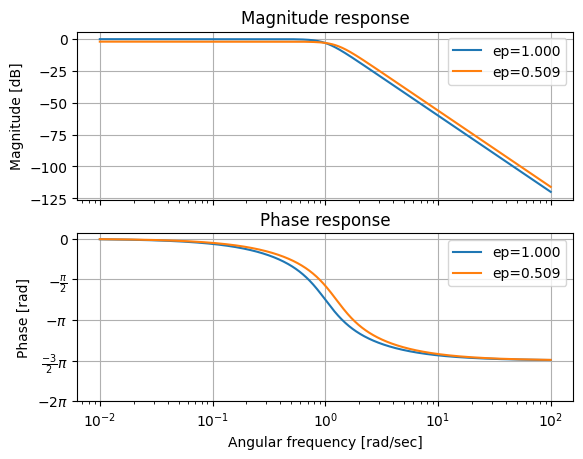

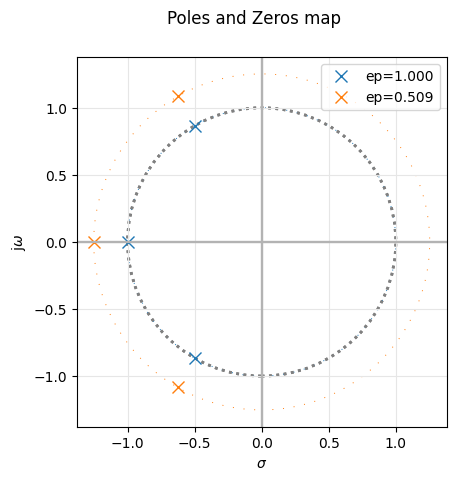

In [10]:
ep = [1, (10**0.1 -1)**(1/2)]

for i in range(len(ep)): 
    my_tf = TransferFunction( [ep[i]**(-2/3)], [1, 2*ep[i]**(-1/3), 2*ep[i]**(-2/3), ep[i]**-1] )

    bodePlot(my_tf, fig_id=1, filter_description = 'ep={:3.3f}'.format(ep[i]) )
    pzmap(my_tf, fig_id=2, filter_description = 'ep={:3.3f}'.format(ep[i]) ) #S plane pole/zero plot

Observamos como claramente en el gráfico de módulo y fase la diferencia entre ambas simulaciones es un simple desplazamiento en frecuencia (la gráfica con $\epsilon$ mas chico comienza a decaer después), esto se produce debido a que la transferencia de butter tiene una norma de frecuencia distinta que se verá afectada al realizar la desnormalización.

En el mapa de polos y ceros también se evidencia lo que se habló previametne, si $\epsilon$ es unitario, los polos se ubican sobre la circunferencia unitaria, mientras que si posee otro valor lo harán en la circunferencia de radio $\epsilon^{\frac{-1}{n}}$

## Conclusiones

De este trabajo se pudo comprobar la facilidad que presentan trabajar con este tipo de filtros, con una plantilla se pudo recrear un filtro que cumple a la prefección las especificaciones. La simetría que presentan en su plano de polos y ceros permite que la normalización de los circuitos sea sencilla y con un simple RLC en cascada con un RC se creó un buen filtro pasa bajos. Por otro lado, se comprobó como siempre conviene utilizar la transferencia de butter y luego desnormalizar para el $\epsilon$ pedido, ya que hacer esto facilita mucho la matemática y evita perderse con las potencias del coeficiente, las cuales pueden confundir bastante. 